In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import warnings
warnings.filterwarnings('ignore')


In [3]:
housing_data = pd.read_csv('BostonHousing.csv')

In [4]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:

housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
housing_data.duplicated().sum()

0

In [19]:

X = housing_data.drop(columns = ['MEDV'])
y = housing_data.MEDV
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [21]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)


Epoch 1/200
9/9 [==============================] - 1s 33ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/200
9/9 [==============================] - 0s 8ms/step 

9/9 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 71/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 72/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 73/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 74/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 75/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 76/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 77/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 78/200
9/9 [==============================] - 0s 7ms/step - los

9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 140/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 141/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 142/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 143/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 144/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 145/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 146/200
9/9 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 147/200
9/9 [==============================] - 0s 6ms/st

In [23]:
print(len(history.history['mae']))

200


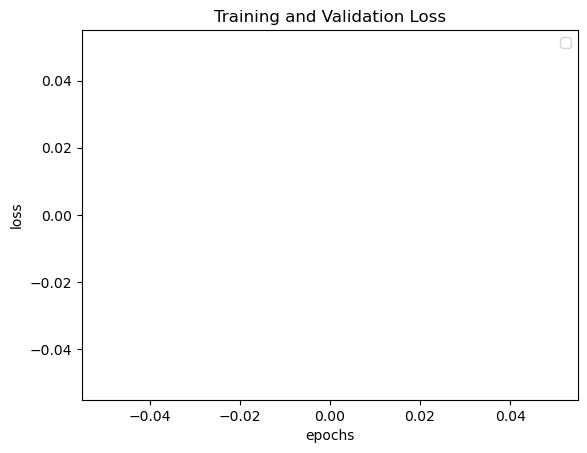

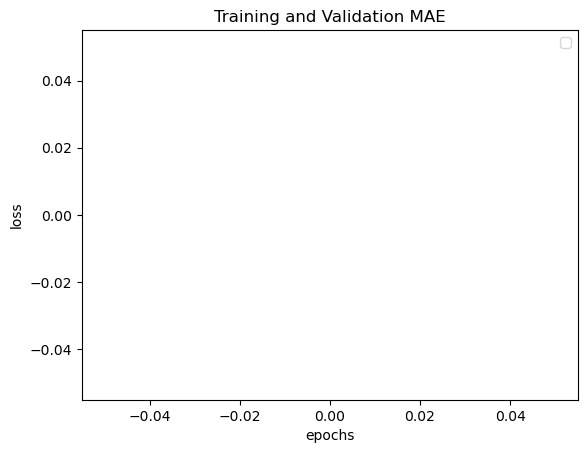

In [26]:
sns.scatterplot(y = history.history['loss'],x = range(1,200+1))
sns.scatterplot(y = history.history['val_loss'],x = range(1,200+1))
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training Loss','Validation_Loss'])
plt.show()
sns.scatterplot(y = history.history['mae'],x = range(1,200+1))
sns.scatterplot(y = history.history['val_mae'],x = range(1,200+1))
plt.title('Training and Validation MAE')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training Mae','Validation_Mae'])
plt.show()
